# 1. Import Package & Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#libraries
import matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.formula.api import ols
from random import sample

import graphviz
import pydot
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import KFold

In [ ]:
import scipy

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
#import glmnet as gln

from tqdm.notebook import tqdm # a python package that provides progress bars for iterables
from operator import itemgetter
from itertools import combinations

from sklearn.preprocessing import scale 
#from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
#from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
#import data
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
test_id = test['PassengerId']

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. Data

## 2.1 Data Overview
* Survived : Response Variable
* Sex : Categorical Variable
* Carbin : Categorical Variable
* Embarked : Categorical Variable
* Pclass : Categorical Variable
* Age :  Numerical Variable
* SibSp	: Numerical Variable
* Parch : Numerical Variable
* Fare : Numerical Variable


In [ ]:
train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0,891.0
mean,0.383838,2.308642,0.647587,29.489981,0.523008,0.381594,32.665804,0.904602,0.397306,25.921534,0.242424,0.206510,0.0,0.0
std,0.486592,0.836071,0.477990,13.615985,1.102743,0.806057,49.518987,1.613459,0.489615,43.530183,0.428790,0.405028,0.0,0.0
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000,0.000000,1.320833,0.000000,0.000000,0.0,0.0
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.925000,0.000000,0.000000,7.795800,0.000000,0.000000,0.0,0.0
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,15.100000,0.000000,0.000000,10.500000,0.000000,0.000000,0.0,0.0
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,1.000000,26.550000,0.000000,0.000000,0.0,0.0
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,512.329200,1.000000,1.000000,0.0,0.0


Sex & Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

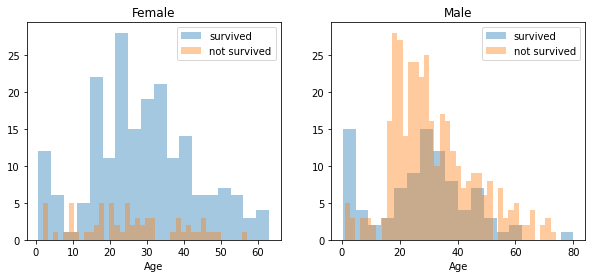

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Embarked, Pclass and Sex

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


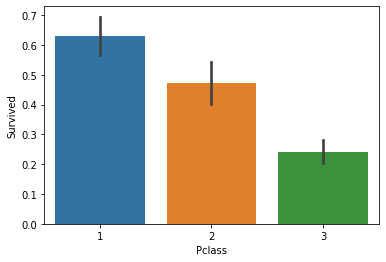

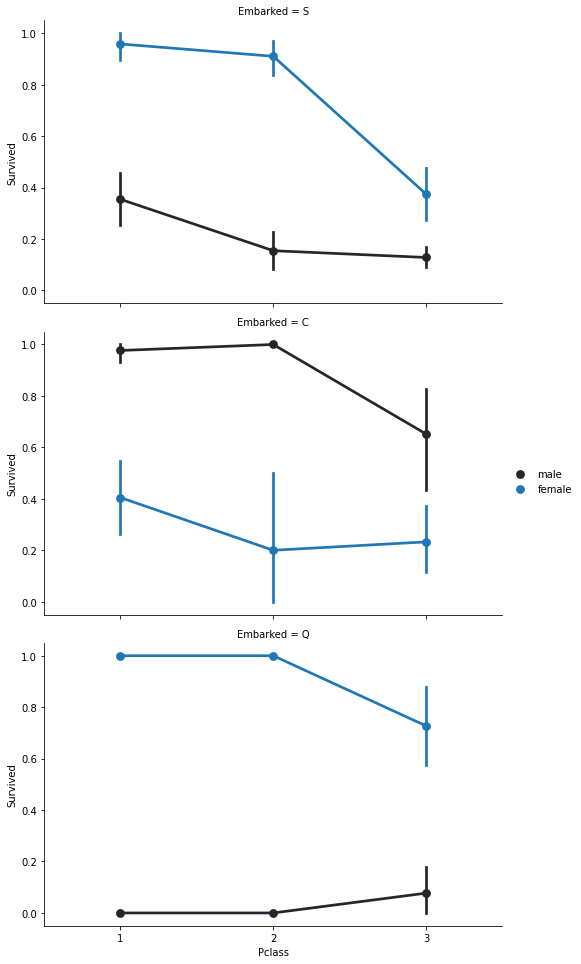

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

SibSp and Parch

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


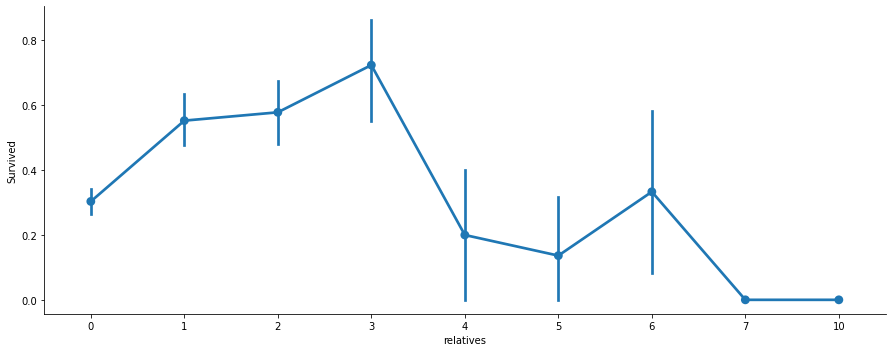

In [ ]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
# train['not_alone'].value_counts()

axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

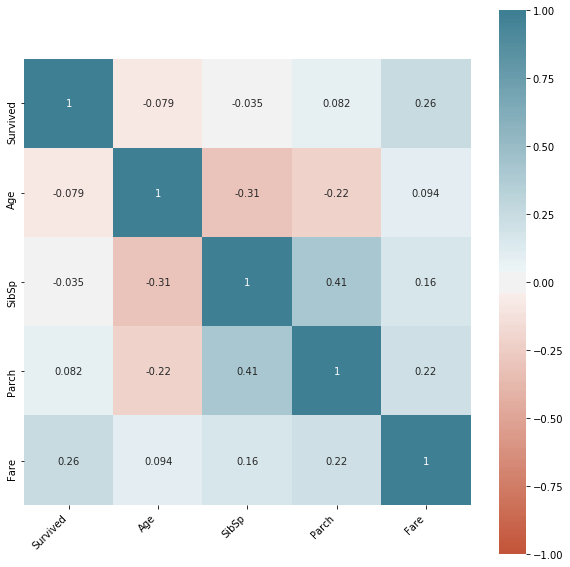

In [ ]:
plt.figure(figsize=(10, 10))
# Numeric columns of the dataset
numeric_col1 = ['Survived', 'Age','SibSp','Parch','Fare']
 
# Correlation Matrix formation
corr_matrix = train.loc[:,numeric_col1].corr()
 
#Using heatmap to visualize the correlation matrix
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#ref: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

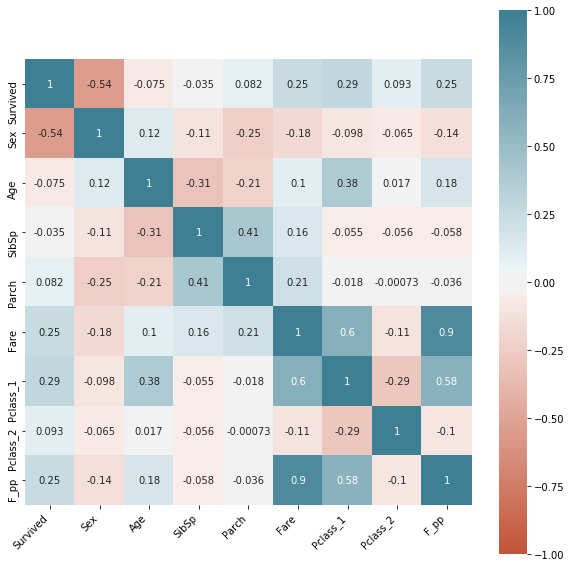

In [ ]:
plt.figure(figsize=(10, 10))
numeric_col2 = ['Survived', 'Sex', 'Age','SibSp','Parch','Fare', 'Pclass_1','Pclass_2','F_pp']
# Correlation Matrix formation
corr_matrix = train.loc[:,numeric_col2].corr()
 
#Using heatmap to visualize the correlation matrix
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#train['Pclass_1'] = train['Pclass_1'].astype('category')
#train['Pclass_2'] = train['Pclass_2'].astype('category')
#train['Embarked_S'] = train['Embarked_S'].astype('category')
#train['Embarked_C'] = train['Embarked_C'].astype('category')

#test['Pclass_1'] = test['Pclass_1'].astype('category')
#test['Pclass_2'] = test['Pclass_2'].astype('category')
#test['Embarked_S'] = test['Embarked_S'].astype('category')
#test['Embarked_C'] =test['Embarked_C'].astype('category')

cate_cols = ['Pclass','Sex','Embarked','Pclass_1','Pclass_2','Embarked_S','Embarked_C']
for i in range(len(cate_cols)):
    col = cate_cols[i]
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,0,3,1,22.0,1,0,7.2500,S,1,1,7.2500,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,1,1,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,7.9250,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,S,1,1,53.1000,1,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,8.0500,0,0,0,0


In [ ]:
#finalized the dataset
X = train.drop(['Pclass','Embarked','Survived'],axis = 1)
y = train['Survived']

## 2.2 Data Cleaning and Processing
(1) Remove *PassengerId*, *Name* and *Ticket* since they are less correlated with survival state.

(2) Deal with some Na values in the datasets

(3) Decide which variables to be treated as categorical variables and process them

(1) Removal

In [ ]:
tr_Cabin = train['Cabin']
train.drop(['PassengerId', 'Name', 'Ticket','Cabin'],axis = 1, inplace=True)
te_Cabin = test['Cabin']
test.drop(['PassengerId', 'Name', 'Ticket','Cabin'],axis = 1, inplace=True)

(2) Fill NA

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(len(percent_1))

In [ ]:
#which cols contain na?
pd.isnull(train).sum()>0

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [ ]:
pd.isnull(test).sum()>0

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [ ]:
#Fill Na in train_embarked
train['Age'].fillna(-1, inplace = True)
test['Age'].fillna(-1, inplace = True)
train[train.isna().any(axis=1)]

In [ ]:
df1 = train[['Fare','Embarked']]
df2 = test[['Fare','Embarked']]
df = pd.concat([df1,df2],axis = 0)
g = df.groupby('Embarked')
g.mean()

,Fare
Embarked,
C,62.336267
Q,12.409012
S,27.418824


In [ ]:
train['Embarked'].fillna('C', inplace = True)

In [ ]:
#Deal with train/test_Fare ==0
train.loc[(train['Fare']==0),'Fare'] = 27.418824
test.loc[(test['Fare']==0),'Fare'] = 27.418824

#Deal with test_Fare = Na
test['Fare'].fillna(27.419460, inplace = True)

Converting Features

Name

In [ ]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

Creating New feature

Fam_count

In [ ]:
train['Fam_count'] = train['Parch'] + train['SibSp']  
test['Fam_count'] = test['Parch'] + test['SibSp']  
train['isAlone'] =  (train['Fam_count'] > 0)*1
test['isAlone'] =  (test['Fam_count'] > 0)*1
#fare per person
train['F_pp'] = train['Fare']/train['Fam_count'] 
test['F_pp'] =  test['Fare']/test['Fam_count'] 

F_pp

In [ ]:
for i in range(train.shape[0]):
    if train.F_pp[i] == float('inf'):
        #train.F_pp[i] = train.Fare[i] 
        train.loc[i,'F_pp'] = train.loc[i,'Fare']
        
for i in range(test.shape[0]):
    if test.F_pp[i] == float('inf'):
        test.loc[i,'F_pp'] = test.loc[i,'Fare']

Fill Na in Age

In [ ]:
# Replace NaN in Age with median
# train['Age'].fillna(train['Age'].median(), inplace = True)
# test['Age'].fillna(train['Age'].median(), inplace = True) #?

# test['Fare'].fillna(train['Fare'].median(), inplace = True)  #?

In [ ]:
train['Sex']=(train['Sex']=='male')*1
test['Sex']=(test['Sex']=='male')*1

In [ ]:
train['Pclass_1'] = (train['Pclass']==1)*1
train['Pclass_2'] = (train['Pclass']==2)*1
train['Embarked_S'] = (train['Embarked']=='S')*1
train['Embarked_C'] = (train['Embarked']=='C')*1

test['Pclass_1'] = (test['Pclass']==1)*1
test['Pclass_2'] = (test['Pclass']==2)*1
test['Embarked_S'] = (test['Embarked']=='S')*1
test['Embarked_C'] = (test['Embarked']=='C')*1

In [ ]:
df1 = train.drop('Survived',axis = 1)
total =pd.concat([df1,test],axis = 0)

age_na = total.loc[total['Age'] == -1]
age_na = age_na.drop(['Age'],axis = 1)
age_notna  = total.drop(total[total['Age'] == -1].index)

In [ ]:
X_train = age_notna[['Sex','SibSp','Parch','Fare','Pclass_1','Pclass_2','Embarked_S','Embarked_C']]
y_train = age_notna[['Age']]

X_pred = age_na[['Sex','SibSp','Parch','Fare','Pclass_1','Pclass_2','Embarked_S','Embarked_C']]

In [ ]:
regr1 = RandomForestRegressor(max_features=6, random_state=1)
regr1.fit(X_train, y_train)
pred = regr1.predict(X_pred)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
count = 0
for i in range(train.shape[0]):
    if train.Age[i] == -1:
        train.loc[i,'Age'] = pred[count]
        count += 1

for i in range(test.shape[0]):
    if test.Age[i] == -1:
        test.loc[i,'Age'] = pred[count]
        count += 1    

In [ ]:
#combo = [train, test]
#for item in combo:
#   item['Embarked'] = item['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

In [ ]:
#create a categorical variables called age_group
#labels=['{0} - {1}'.format(i,i+9) for i in range(0,100,10)]
#train['Age_group'] = pd.cut(train['Age'],range(0,105,10),right=False,labels=labels)
#test['Age_group'] = pd.cut(test['Age'],range(0,105,10),right=False,labels=labels)

Categories

In [ ]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# 3. Model

### 3.0 Model Comparison

In [ ]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

Random Forest

In [ ]:
rf_acc_list = np.zeros(5)
for i in range(5):
    random_forest = RandomForestClassifier(n_estimators=100)
    rf_acc_list[i] =cross_val_score(random_forest, X_train, Y_train, cv=5).mean()

print(np.mean(rf_acc_list))
print(np.std(rf_acc_list))

0.8217927311530978
0.0008391895435205904


Logistic Regression

In [ ]:
lr_acc_list = np.zeros(5)
for i in range(5):
    logreg = LogisticRegression()
    lr_acc_list[i] =cross_val_score(logreg, X_train, Y_train, cv=5).mean()

print(np.mean(lr_acc_list))
print(np.std(lr_acc_list))

0.8159249262444291
0.0


Linear Support Vector Machine

In [ ]:
svm_acc_list = np.zeros(5)
for i in range(5):
    linear_svc = LinearSVC()
    svm_acc_list[i] =cross_val_score(linear_svc, X_train, Y_train, cv=5).mean()

print(np.mean(svm_acc_list))
print(np.std(svm_acc_list))

0.80739815454146
0.0005504471332096716


Decision Tree

In [ ]:
dt_acc_list = np.zeros(5)
for i in range(5):
    decision_tree = DecisionTreeClassifier(max_leaf_nodes=15)
    dt_acc_list[i] =cross_val_score(decision_tree, X_train, Y_train, cv=5).mean()

print(np.mean(dt_acc_list))
print(np.std(dt_acc_list))

0.8110062142991652
0.0005504471332096716


K Nearest Neighbor

In [ ]:
knn_acc_list = np.zeros(5)
for i in range(5):
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn_acc_list[i] =cross_val_score(knn, X_train, Y_train, cv=5).mean()

print(np.mean(knn_acc_list))
print(np.std(knn_acc_list))

0.8013872324398971
0.0


### 3.1 Random Forest

In [ ]:
rf_acc = 0
rf_model = RandomForestClassifier(max_features=6, random_state=1)
rf_acc =cross_val_score(rf_model, X, y, cv=5).mean()

In [ ]:
rf_acc

0.8069989328981231

In [ ]:
#tunning paramters
criteria = ['gini','entropy']
max_feature = range(1,12)
min_samples_splits = [1,20,40,60,80]
min_samples_leafs = [1,20,40,60,80]

In [ ]:
rf_acc = np.zeros(6)
for i in range(7,13):
    rf_model = RandomForestClassifier(max_features=i, random_state=1)
    rf_acc[i-7] =cross_val_score(rf_model, X, y, cv=5).mean()

In [ ]:
rf_acc

array([0.81150587, 0.80586278, 0.81483899, 0.81148704, 0.81036972,
       0.81708618, 0.        ])

In [ ]:
min_samples_splits = [5,10,20,40,60,80]
rf_acc = np.zeros(len(min_samples_splits))
for i in range(len(min_samples_splits)):
    j = min_samples_splits[i]
    rf_model = RandomForestClassifier(max_features=12, random_state=1,min_samples_split = j)
    rf_acc[i] =cross_val_score(rf_model, X, y, cv=5).mean()

In [ ]:
rf_acc 

array([0.83166782, 0.84402109, 0.83170548, 0.81595003, 0.80254849,
       0.80029502])

In [ ]:
#final parameter: max_features=12, min_samples_split = 10
rf_model = RandomForestClassifier(max_features=12, random_state=1,min_samples_split = 10)
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

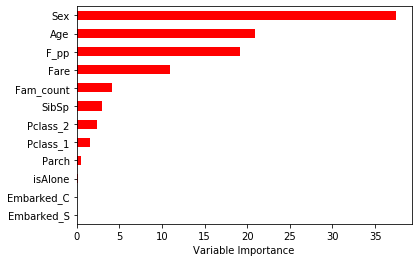

In [ ]:
Importance = pd.DataFrame({'Importance':rf_model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,0,3,1,22.0,1,0,7.2500,S,1,1,7.2500,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,1,1,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,7.9250,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,S,1,1,53.1000,1,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,8.0500,0,0,0,0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,3,1,34.5,0,0,7.8292,Q,0,0,7.82920,0,0,0,0
1,3,0,47.0,1,0,7.0000,S,1,1,7.00000,0,0,0,0
2,2,1,62.0,0,0,9.6875,Q,0,0,9.68750,0,1,0,0
3,3,1,27.0,0,0,8.6625,S,0,0,8.66250,0,0,0,0
4,3,0,22.0,1,1,12.2875,S,2,1,6.14375,0,0,0,0


In [ ]:
X.head()

,Sex,Age,SibSp,Parch,Fare,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,1,22.0,1,0,7.2500,1,1,7.2500,0,0,0,0
1,0,38.0,1,0,71.2833,1,1,71.2833,1,0,0,0
2,0,26.0,0,0,7.9250,0,0,7.9250,0,0,0,0
3,0,35.0,1,0,53.1000,1,1,53.1000,1,0,0,0
4,1,35.0,0,0,8.0500,0,0,8.0500,0,0,0,0


In [ ]:
#make prediction
X_test = test.drop(['Pclass','Embarked'],axis = 1)
y_pred = rf_model.predict(X_test)

In [ ]:
#temp 
#test1 = pd.read_csv('titanic/test.csv')
#test1.head()
#test_id = test1['PassengerId']

In [ ]:
 # Write to csv       
df1 = pd.DataFrame({'PassengerId' : test_id,'Survived': y_pred})
df1.to_csv("result.csv",index=False,sep=',')

### 3.2 Decision Trees

In [ ]:
regr = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
tuned_parameters = {'ccp_alpha': np.logspace(-4, 1, 50)}

# search the parameter space with cross-validation
n_folds = 5
regressor = GridSearchCV(regr, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error')
regressor.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=15,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='depreca...
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
  

In [ ]:
# Choose the best CV parameters
regressor.best_params_
# The estimator at the CV best model
best_regr = regressor.best_estimator_
best_regr.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.006866488450042998, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=15, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')

In [ ]:
best_regr.score(X,y)

0.8305274971941639

In [ ]:
print(classification_report(y, best_regr.predict(X)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



### 3.3 Logistic Regression

In [ ]:
# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
# I do not know the details on the differences between the solvers.
clf = skl_lm.LogisticRegression(solver='newton-cg')
#X_train = df.balance.values.reshape(-1,1)
clf.fit(X,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
classes:  [0 1]
coefficients:  [[-2.51439339e+00 -4.14451537e-02 -2.96068078e-01  2.68925577e-02
   1.37934127e-03 -2.69175521e-01  7.18372129e-01  1.15479638e-03
   2.08171149e+00  1.02105620e+00  0.00000000e+00  0.00000000e+00]]
intercept : [1.51612927]


In [ ]:
clf.score(X,y)

0.8058361391694725

#### (1) Backward Selection

In [ ]:
#Copyright 2019 Sinan Talha Hascelik
#https://github.com/talhahascelik/python_stepwiseSelection/blob/master/test.py
#Licensed under the Apache License, Version 2.0 (the "License");
#you may not use this file except in compliance with the License.
#You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
#Unless required by applicable law or agreed to in writing, software
#distributed under the License is distributed on an "AS IS" BASIS,
#WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#See the License for the specific language governing permissions and
#limitations under the License.

import numpy as np
import pandas as pd

def forwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Forward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    
    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    
    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    
    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __forwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)
    
def backwardSelection(X, y, model_type ="linear",elimination_criteria = "aic", varchar_process = "dummy_dropfirst", sl=0.05):
    """
    Backward Selection is a function, based on regression models, that returns significant features and selection iterations.\n
    Required Libraries: pandas, numpy, statmodels
    
    Parameters
    ----------
    X : Independent variables (Pandas Dataframe)\n
    y : Dependent variable (Pandas Series, Pandas Dataframe)\n
    model_type : 'linear' or 'logistic'\n
    elimination_criteria : 'aic', 'bic', 'r2', 'adjr2' or None\n
        'aic' refers Akaike information criterion\n
        'bic' refers Bayesian information criterion\n
        'r2' refers R-squared (Only works on linear model type)\n
        'r2' refers Adjusted R-squared (Only works on linear model type)\n
    varchar_process : 'drop', 'dummy' or 'dummy_dropfirst'\n
        'drop' drops varchar features\n
        'dummy' creates dummies for all levels of all varchars\n
        'dummy_dropfirst' creates dummies for all levels of all varchars, and drops first levels\n
    sl : Significance Level (default: 0.05)\n
    
    Returns
    -------
    columns(list), iteration_logs(str)\n\n
    Not Returns a Model
    
    Tested On
    ---------
    Python v3.6.7, Pandas v0.23.4, Numpy v1.15.04, StatModels v0.9.0
    
    See Also
    --------
    https://en.wikipedia.org/wiki/Stepwise_regression    
    """
    X = __varcharProcessing__(X,varchar_process = varchar_process)
    return __backwardSelectionRaw__(X, y, model_type = model_type,elimination_criteria = elimination_criteria , sl=sl)

def __varcharProcessing__(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes
    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())
        #print("Character Variables (Dropped):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)
        #print("Character Variables (Dummies Generated):", dtypes[dtypes == np.object].index.tolist())
    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)
        #print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    else: 
        X = pd.get_dummies(X,drop_first=True)
        #print("Character Variables (Dummies Generated, First Dummies Dropped):", dtypes[dtypes == np.object].index.tolist())
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

def __forwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):

    iterations_log = ""
    cols = X.columns.tolist()
    
    def regressor(y,X, model_type=model_type):
        if model_type == "linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    
    selected_cols = ["intercept"]
    other_cols = cols.copy()
    other_cols.remove("intercept")
    
    model = regressor(y, X[selected_cols])
    
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    
    for i in range(X.shape[1]):
        pvals = pd.DataFrame(columns = ["Cols","Pval"])
        for j in other_cols:
            model = regressor(y, X[selected_cols+[j]])
            pvals = pvals.append(pd.DataFrame([[j, model.pvalues[j]]],columns = ["Cols","Pval"]),ignore_index=True)
        pvals = pvals.sort_values(by = ["Pval"]).reset_index(drop=True)
        pvals = pvals[pvals.Pval<=sl]
        if pvals.shape[0] > 0:
            
            model = regressor(y, X[selected_cols+[pvals["Cols"][0]]])
            iterations_log += str("\nEntered : "+pvals["Cols"][0] + "\n")    
            iterations_log += "\n\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n\n"
                    
        
            if  elimination_criteria == "aic":
                new_criteria = model.aic
                if new_criteria < criteria:
                    #print("Entered :", pvals["Cols"][0], "\tAIC :", model.aic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    #print("break : Criteria")
                    break
            elif  elimination_criteria == "bic":
                new_criteria = model.bic
                if new_criteria < criteria:
                    #print("Entered :", pvals["Cols"][0], "\tBIC :", model.bic)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    #print("break : Criteria")
                    break        
            elif  elimination_criteria == "r2" and model_type =="linear":
                new_criteria = model.rsquared
                if new_criteria > criteria:
                    #print("Entered :", pvals["Cols"][0], "\tR2 :", model.rsquared)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    #print("break : Criteria")
                    break           
            elif  elimination_criteria == "adjr2" and model_type =="linear":
                new_criteria = model.rsquared_adj
                if new_criteria > criteria:
                    #print("Entered :", pvals["Cols"][0], "\tAdjR2 :", model.rsquared_adj)
                    selected_cols.append(pvals["Cols"][0])
                    other_cols.remove(pvals["Cols"][0])
                    criteria = new_criteria
                else:
                    #print("Break : Criteria")
                    break
            else:
                #print("Entered :", pvals["Cols"][0])
                selected_cols.append(pvals["Cols"][0])
                other_cols.remove(pvals["Cols"][0])            
                
        else:
            #print("Break : Significance Level")
            break
        
    model = regressor(y, X[selected_cols])
    if elimination_criteria == "aic":
        criteria = model.aic
    elif elimination_criteria == "bic":
        criteria = model.bic
    elif elimination_criteria == "r2" and model_type =="linear":
        criteria = model.rsquared
    elif elimination_criteria == "adjr2" and model_type =="linear":
        criteria = model.rsquared_adj
    
    print(model.summary())
    print("AIC: "+str(model.aic))
    print("BIC: "+str(model.bic))
    print("Final Variables:", selected_cols)

    return selected_cols #, iterations_log

def __backwardSelectionRaw__(X, y, model_type ="linear",elimination_criteria = "aic", sl=0.05):
    
    iterations_log = ""
    last_eleminated = ""    
    cols = X.columns.tolist()

    def regressor(y,X, model_type=model_type):
        if model_type =="linear":
            regressor = sm.OLS(y, X).fit()
        elif model_type == "logistic":
            regressor = sm.Logit(y, X).fit()
        else:
            #print("\nWrong Model Type : "+ model_type +"\nLinear model type is seleted.")
            model_type = "linear"
            regressor = sm.OLS(y, X).fit()
        return regressor
    for i in range(X.shape[1]):
        if i != 0 :          
            if elimination_criteria == "aic":
                criteria = model.aic
                new_model = regressor(y,X)
                new_criteria = new_model.aic
                if criteria < new_criteria:
                    #print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "bic":
                criteria = model.bic
                new_model = regressor(y,X)
                new_criteria = new_model.bic
                if criteria < new_criteria:
                    #print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "adjr2" and model_type =="linear":
                criteria = model.rsquared_adj
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared_adj
                if criteria > new_criteria:
                    #print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break  
            elif elimination_criteria == "r2" and model_type =="linear":
                criteria = model.rsquared
                new_model = regressor(y,X)
                new_criteria = new_model.rsquared
                if criteria > new_criteria:
                    #print("Regained : ", last_eleminated)
                    iterations_log += "\n"+str(new_model.summary())+"\nAIC: "+ str(new_model.aic) + "\nBIC: "+ str(new_model.bic)+"\n"
                    iterations_log += str("\n\nRegained : "+last_eleminated + "\n\n")
                    break   
            else: 
                new_model = regressor(y,X)
            model = new_model
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        else:
            model = regressor(y,X)
            iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
        maxPval = max(model.pvalues)
        cols = X.columns.tolist()
        if maxPval > sl:
            for j in cols:
                if (model.pvalues[j] == maxPval):
                    #print("Eliminated :" ,j)
                    iterations_log += str("\n\nEliminated : "+j+ "\n\n")
                    
                    del X[j]
                    last_eleminated = j
        else:
            break
    print(str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic))
    print("Final Variables:", cols)
    iterations_log += "\n"+str(model.summary())+"\nAIC: "+ str(model.aic) + "\nBIC: "+ str(model.bic)+"\n"
    return cols #, iterations_log

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,0,3,1,22.0,1,0,7.2500,S,1,1,7.2500,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,1,1,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,7.9250,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,S,1,1,53.1000,1,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,8.0500,0,0,0,0


In [ ]:
X.head()

,Sex,Age,SibSp,Parch,Fare,Fam_count,isAlone,F_pp,Pclass_1,Pclass_2,Embarked_S,Embarked_C
0,1,22.0,1,0,7.2500,1,1,7.2500,0,0,0,0
1,0,38.0,1,0,71.2833,1,1,71.2833,1,0,0,0
2,0,26.0,0,0,7.9250,0,0,7.9250,0,0,0,0
3,0,35.0,1,0,53.1000,1,1,53.1000,1,0,0,0
4,1,35.0,0,0,8.0500,0,0,8.0500,0,0,0,0


In [ ]:
X_train = train.drop(['Survived','Pclass_1','Pclass_2','Embarked_S','Embarked_C'],axis = 1)
final_vars, iterations_logs = backwardSelection(X_train,y, model_type="logistic")

Character Variables (Dummies Generated, First Dummies Dropped): ['Embarked']
Optimization terminated successfully.
         Current function value: 0.433016
         Iterations 8
Eliminated : Parch
Optimization terminated successfully.
         Current function value: 0.433016
         Iterations 7
Eliminated : Fare
Optimization terminated successfully.
         Current function value: 0.433018
         Iterations 7
Eliminated : Embarked_Q
Optimization terminated successfully.
         Current function value: 0.433082
         Iterations 7
Eliminated : F_pp
Optimization terminated successfully.
         Current function value: 0.433159
         Iterations 7
Eliminated : Embarked_S
Optimization terminated successfully.
         Current function value: 0.434696
         Iterations 7
Regained :  Embarked_S
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                     

In [ ]:
X_train = train[ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Fam_count', 'isAlone', 'Embarked_S']]
logit2 = skl_lm.LogisticRegression(solver='newton-cg')
#X_train = df.balance.values.reshape(-1,1)
logit2.fit(X_train,y)
logit2.score(X_train,y)

0.8092031425364759

In [ ]:
X_train = train.drop(['Survived','Pclass','Embarked'],axis = 1)
final_vars, iterations_logs = backwardSelection(X_train,y, model_type="logistic")

Character Variables (Dummies Generated, First Dummies Dropped): []
Optimization terminated successfully.
         Current function value: 0.432988
         Iterations 9


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


Eliminated : Fare
Optimization terminated successfully.
         Current function value: 0.432991
         Iterations 8
Eliminated : Parch
Optimization terminated successfully.
         Current function value: 0.432991
         Iterations 7
Eliminated : Embarked_C
Optimization terminated successfully.
         Current function value: 0.433056
         Iterations 7
Eliminated : F_pp
Optimization terminated successfully.
         Current function value: 0.433149
         Iterations 7
Eliminated : Embarked_S
Optimization terminated successfully.
         Current function value: 0.434650
         Iterations 7
Regained :  Embarked_S
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Fri, 01 Oct 2021   Pseudo R

In [ ]:
X_train = train[ [ 'Sex', 'Age', 'SibSp', 'Fam_count', 'isAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S']]
logit2 = skl_lm.LogisticRegression(solver='newton-cg')
#X_train = df.balance.values.reshape(-1,1)
logit2.fit(X_train,y)
logit2.score(X_train,y)

0.8092031425364759

#### (2) Forward Selection

In [ ]:
X_train = train.drop(['Survived','Pclass','Embarked'],axis = 1)
final_vars = forwardSelection(X_train,y, model_type="logistic")

Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.663094
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.665272
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.662650
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.628930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.665774
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.645319
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.623341
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.625851
  

In [ ]:
X_train = train[['Sex', 'Pclass', 'Age', 'SibSp', 'isAlone']]
logit2 = skl_lm.LogisticRegression(solver='newton-cg')
#X_train = df.balance.values.reshape(-1,1)
logit2.fit(X_train,y)
logit2.score(X_train,y)

0.8103254769921436

In [ ]:
# iterations
nrep = 200
#best_attr = list()
rss_fw = list()

X_t = train.drop(['Survived','Pclass_1','Pclass_2','Embarked_S','Embarked_C'],axis = 1)

for i in range(nrep):
    err = 0
    print(i)
    #sampling
    index = sample(range(891),int(891*0.8))
    X_tr  = X_t.loc[index]
    y_tr = train['Survived'].loc[index]
    X_valid = X_t.drop(index,axis = 0)
    y_valid = train['Survived'].drop(index,axis = 0)
    
    #fit on the training set, get the final parameters
    final_vars = forwardSelection(X_tr,y_tr, model_type="logistic")
    final_vars.remove('intercept') 
    
    #fit on the validation set
    #X_val = X_valid[final_vars]
    X_val = train[final_vars].drop(index,axis = 0)
    logit_fw = skl_lm.LogisticRegression(solver='newton-cg')
    logit_fw.fit(X_val,y_valid)
    err = logit_fw.score(X_val,y_valid)
    rss_fw.append(err)

In [ ]:
len(rss_fw)

20

In [ ]:
rss_fw

[0.8324022346368715,
 0.7821229050279329,
 0.8212290502793296,
 0.8044692737430168,
 0.8044692737430168,
 0.8100558659217877,
 0.8268156424581006,
 0.8212290502793296,
 0.7932960893854749,
 0.8100558659217877,
 0.8435754189944135,
 0.8044692737430168,
 0.8268156424581006,
 0.8994413407821229,
 0.8100558659217877,
 0.8156424581005587,
 0.8324022346368715,
 0.8156424581005587,
 0.776536312849162,
 0.8435754189944135]

In [ ]:
np.mean(rss_fw)

0.8187150837988828